# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [30]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 649


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [31]:
# Set the API base URL
#url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(e)
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
{'coord': {'lon': 147.3294, 'lat': -42.8794}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 20.05, 'feels_like': 19.44, 'temp_min': 17.37, 'temp_max': 20.14, 'pressure': 1013, 'humidity': 51}, 'visibility': 10000, 'wind': {'speed': 6.69, 'deg': 300}, 'clouds': {'all': 20}, 'dt': 1680574876, 'sys': {'type': 2, 'id': 2002195, 'country': 'AU', 'sunrise': 1680553762, 'sunset': 1680595084}, 'timezone': 36000, 'id': 2163355, 'name': 'Hobart', 'cod': 200}
Processing Record 2 of Set 1 | ilulissat
{'coord': {'lon': -51.1, 'lat': 69.2167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -26.72, 'feels_like': -33.72, 'temp_min': -26.72, 'temp_max': -26.72, 'pressure': 1014, 'humidity': 98, 'sea_level': 1014, 'grnd_level': 1009}, 'visibility'

In [32]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities_2.csv", index_label="City_ID")

In [33]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          604
Lat           604
Lng           604
Max Temp      604
Humidity      604
Cloudiness    604
Wind Speed    604
Country       604
Date          604
dtype: int64

In [34]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobart,-42.8794,147.3294,20.14,51,20,6.69,AU,1680574876
1,ilulissat,69.2167,-51.1000,-26.72,98,26,2.11,GL,1680575042
2,atuona,-9.8000,-139.0333,27.30,76,61,5.84,PF,1680575042
3,hermanus,-34.4187,19.2345,12.11,81,100,1.95,ZA,1680575042
4,cherskiy,68.7500,161.3000,-14.02,72,99,7.38,RU,1680575042


In [35]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chokurdakh,70.6333,147.9167,-20.24,95,100,2.54,RU,1680213519
1,yar-sale,66.8333,70.8333,-18.47,97,99,3.78,RU,1680213519
2,asyut,27.1810,31.1837,14.10,34,0,9.17,EG,1680213519
3,yellowknife,62.4560,-114.3525,-10.71,52,20,1.03,CA,1680213520
4,puerto ayora,-0.7393,-90.3518,30.98,88,67,3.58,EC,1680213520


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

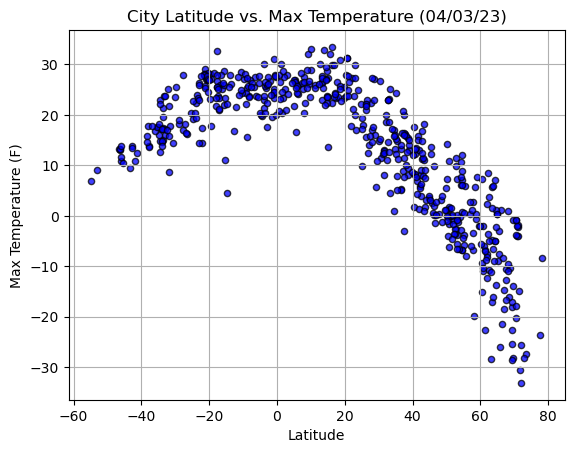

In [36]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

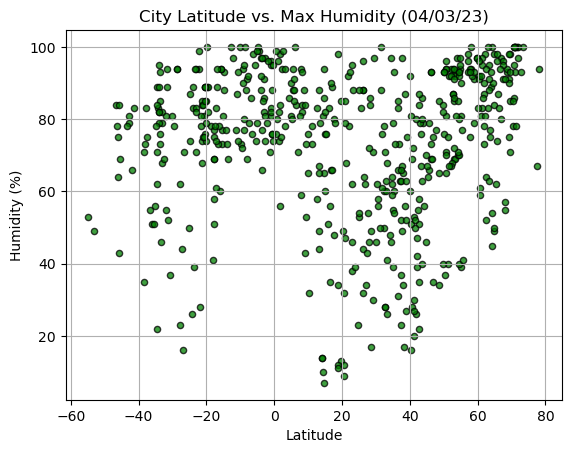

In [37]:
# Build the scatter plots for latitude vs. humidity
# Create scatter plot for Lat vs Humidity.
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', s=20, c='g', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Humidity (%s)" % time.strftime("%x"))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

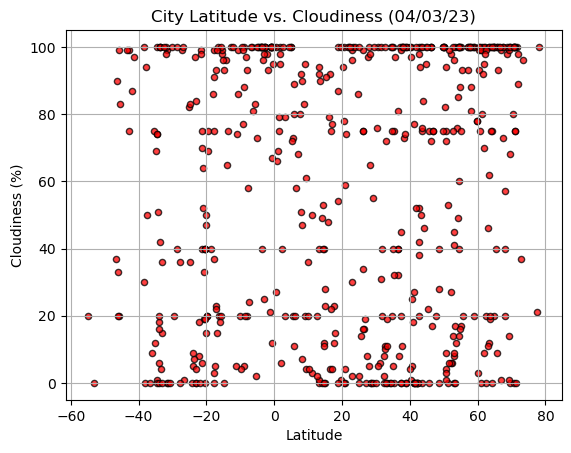

In [38]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', s=20, c='r', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

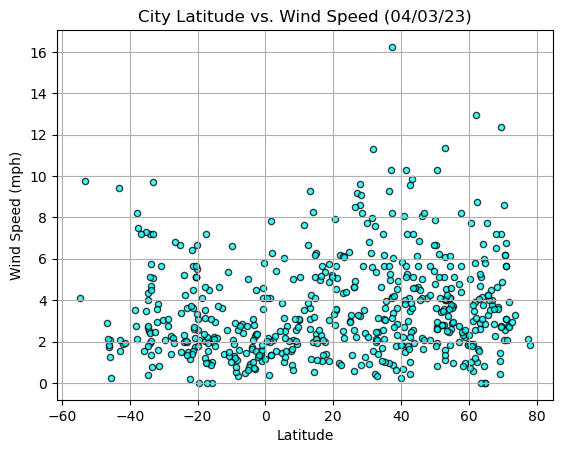

In [39]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', s=20, c='cyan', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:


# Define a function to create Linear Regression plots
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    plt.annotate(line_eq, text_coordinates,
                fontsize=15,
                color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title, wrap=True)
 #   "\n".join(textwrap.wrap(title, 100))

    # Show the plot
    plt.show()
    print(f"The r-value is: {r_value:.3f}")

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chokurdakh,70.6333,147.9167,-20.24,95,100,2.54,RU,1680213519
1,yar-sale,66.8333,70.8333,-18.47,97,99,3.78,RU,1680213519
2,asyut,27.1810,31.1837,14.10,34,0,9.17,EG,1680213519
3,yellowknife,62.4560,-114.3525,-10.71,52,20,1.03,CA,1680213520
5,coahuayana,18.7333,-103.6833,30.84,34,100,3.02,MX,1680213520


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,puerto ayora,-0.7393,-90.3518,30.98,88,67,3.58,EC,1680213520
9,hermanus,-34.4187,19.2345,12.67,83,51,2.53,ZA,1680213521
14,rocha,-34.4833,-54.3333,17.36,89,100,2.66,UY,1680213522
15,yulara,-25.2406,130.9889,20.40,50,82,6.69,AU,1680213522
18,kiunga,-6.1219,141.2906,23.76,98,81,0.49,PG,1680213522


###  Temperature vs. Latitude Linear Regression Plot

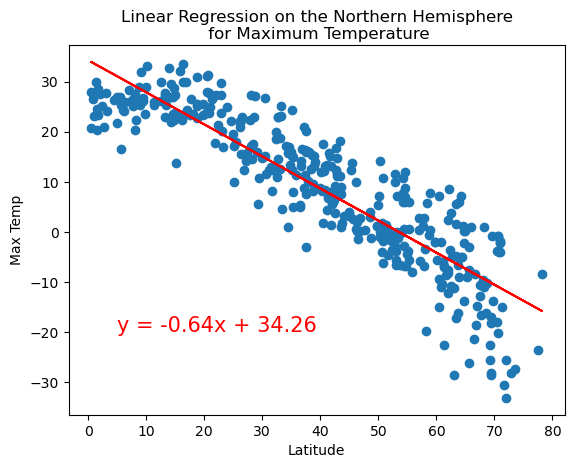

The r-value is: -0.891


In [43]:
# Linear regression on Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature',
                       'Max Temp',(5,-20))

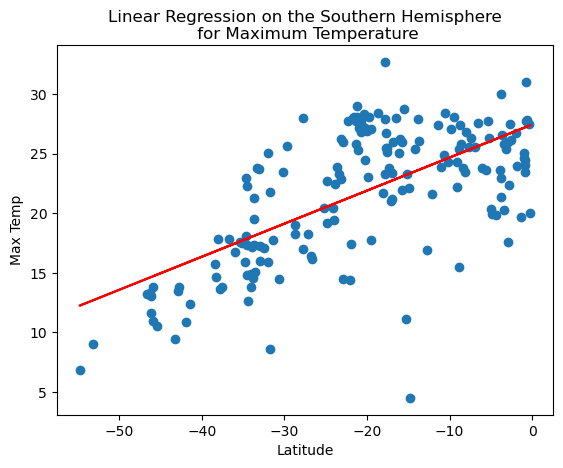

The r-value is: 0.652


In [44]:
# Linear regression on Southern Hemisphere
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]


plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature',
                       'Max Temp',(-45,45))

**Discussion about the linear relationship:** In regards to the Northern and Southern hemispheres, when it comes to the Northern hempisphere, there is a negative correlation between latitude and maximum tempterature. On the other hand, when it comes to the southern hemisphere, there is a positive correlation between latitute and maximum temperature. 

### Humidity vs. Latitude Linear Regression Plot

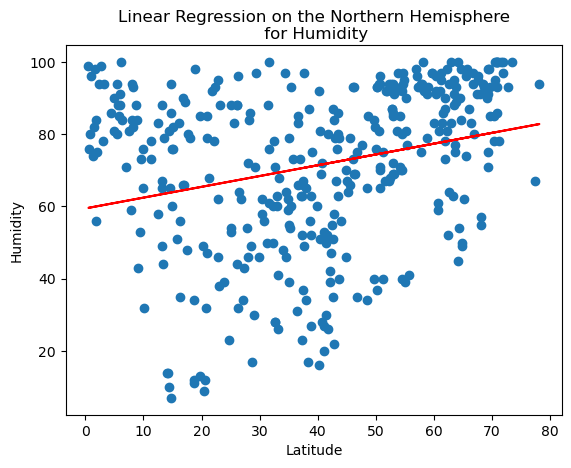

The r-value is: 0.267


In [45]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Humidity',
                       'Humidity',(5,-20))

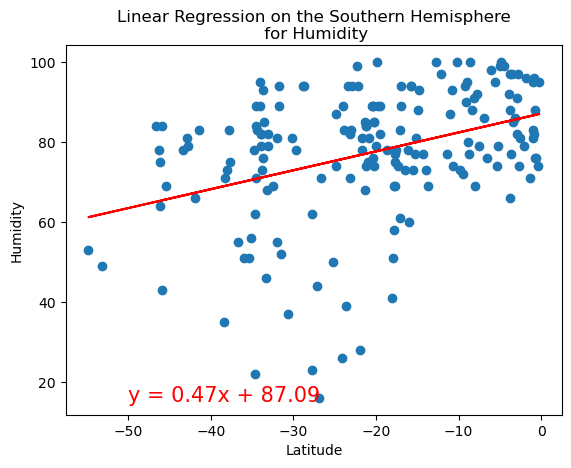

The r-value is: 0.372


In [46]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]


plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Humidity',
                       'Humidity',(-50,15))

**Discussion about the linear relationship:** In regards to humidity and latitudes, there seems to be a positive correlation between latitudes and humidity in the northern and souther hemisthere. The humidity increases as the latitude does. 

### Cloudiness vs. Latitude Linear Regression Plot

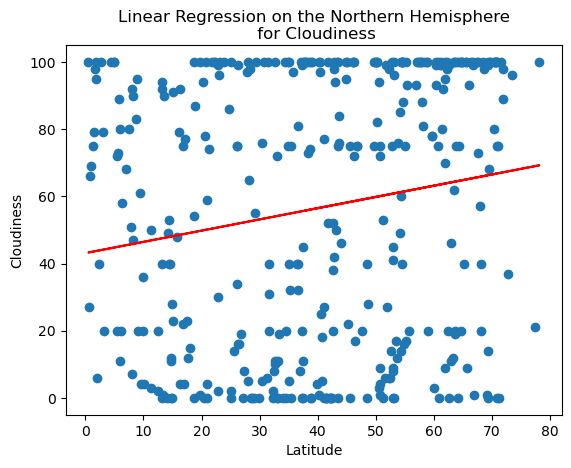

The r-value is: 0.170


In [47]:
# Northern Hemisphere
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Cloudiness',
                       'Cloudiness',(5,-20))

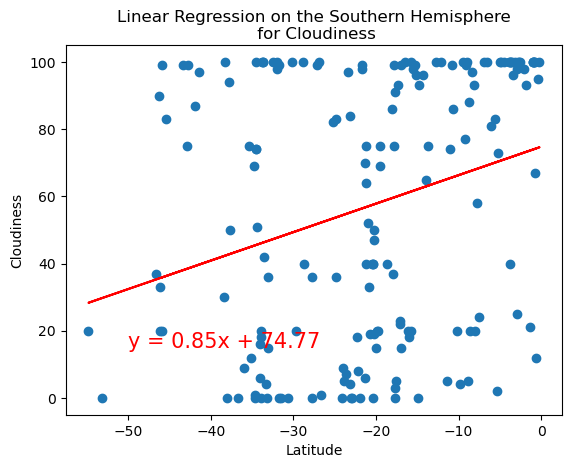

The r-value is: 0.282


In [48]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]


plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Cloudiness',
                       'Cloudiness',(-50,15))

**Discussion about the linear relationship:** As latitude increases for the northern hemisphere we move further away from the equator as it appears to be the same for the southern hemisphere. For both the northern and southern hemisphere, increases in latitude appear to be weakly related to increases in cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

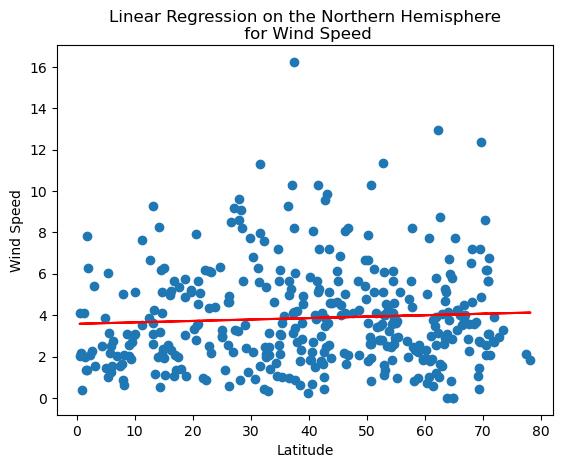

The r-value is: 0.058


In [49]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Wind Speed',
                       'Wind Speed',(15,-35))

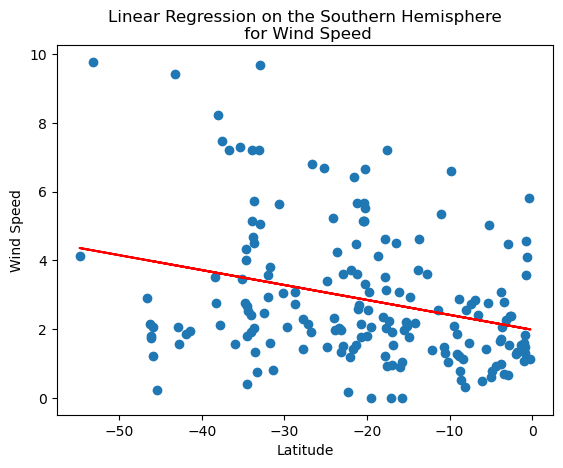

The r-value is: -0.287


In [50]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]


plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Wind Speed',
                       'Wind Speed',(-50,15))

**Discussion about the linear relationship:** There appears to be a weak correlation in regards to the northern hemisphere. On the other hand, in the southern hemisphere it seems as though as the latitude is increasing, so is the wind speed.